In [4]:
# !pip install seaborn matplotlib

In [21]:
import pandas as pd
df_sentiment = pd.read_csv("../data/all_banks_reviews_with_sentiment.csv")
df_themes = pd.read_csv("../data/all_banks_reviews_with_themes.csv")
df = pd.read_csv("../data/all_bank_reviews.csv")
df1 = pd.read_csv("../data/all_bank_reviews.csv")

#### Sentiment Distribution by Bank	

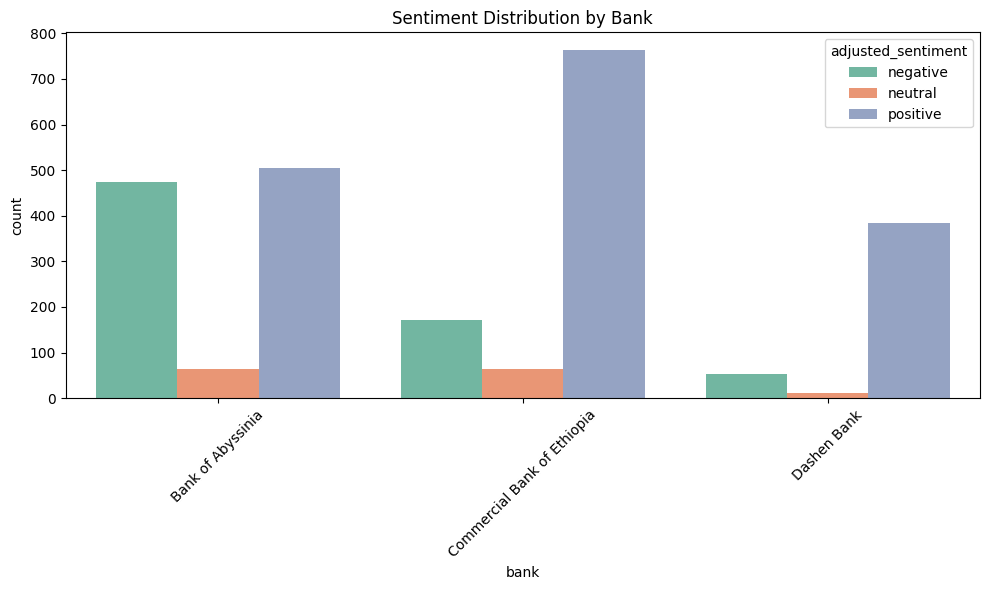

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df_sentiment.groupby(['bank', 'adjusted_sentiment']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_counts, x='bank', y='count', hue='adjusted_sentiment', palette='Set2')
plt.title("Sentiment Distribution by Bank")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/plots/sentiment_by_bank.png")
plt.show()

#### Theme Distribution by Bank	

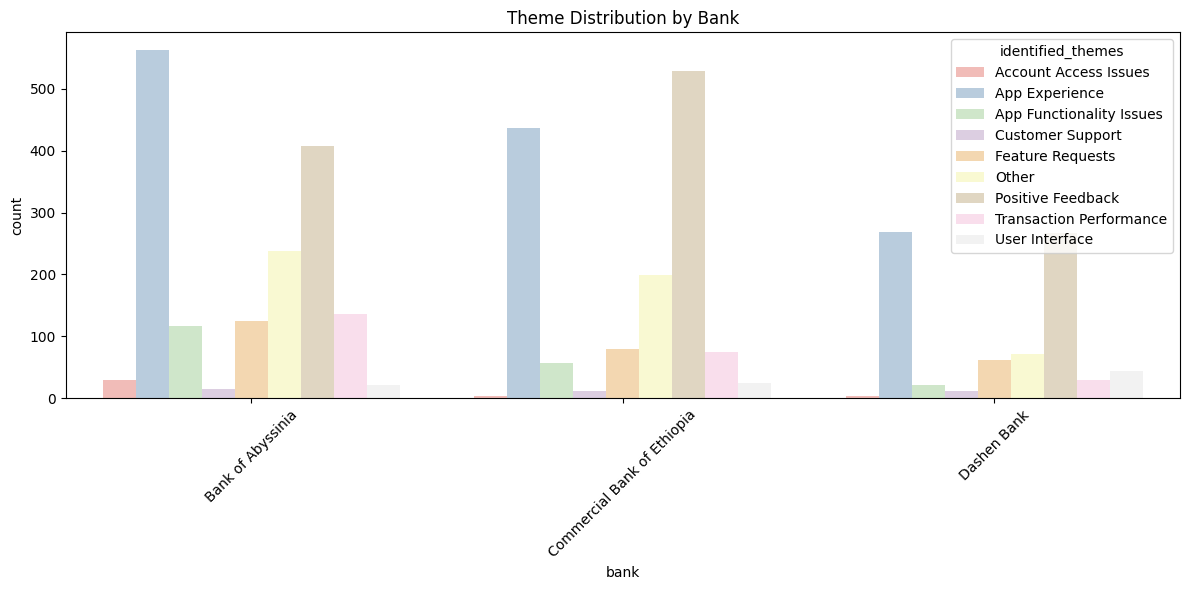

In [24]:
theme_data = df_themes[['bank', 'identified_themes']].copy()
theme_data['identified_themes'] = theme_data['identified_themes'].str.split(', ')
theme_data = theme_data.explode('identified_themes')

theme_counts = theme_data.groupby(['bank', 'identified_themes']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=theme_counts, x='bank', y='count', hue='identified_themes', palette='Pastel1')
plt.title("Theme Distribution by Bank")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/plots/Theme_by_bank.png")
plt.show()

#### Word Cloud – Positive Reviews	

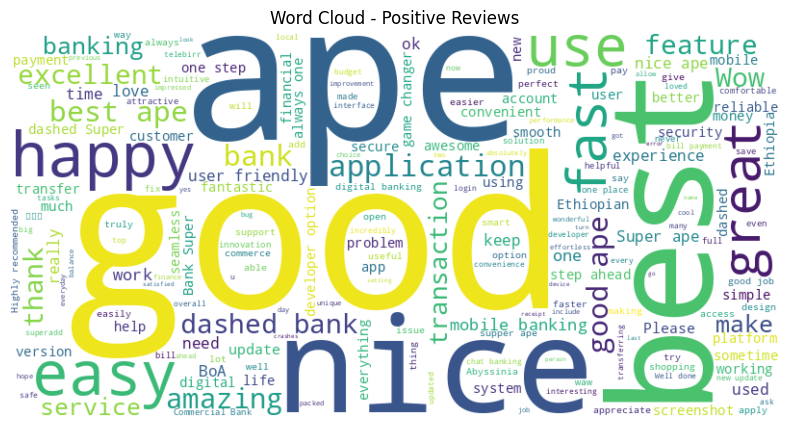

In [25]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['adjusted_sentiment'] == 'positive']['review_corrected'])
wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.savefig("../data/plots/word_cloud.png")
plt.show()

#### Rating Distribution by Bank	

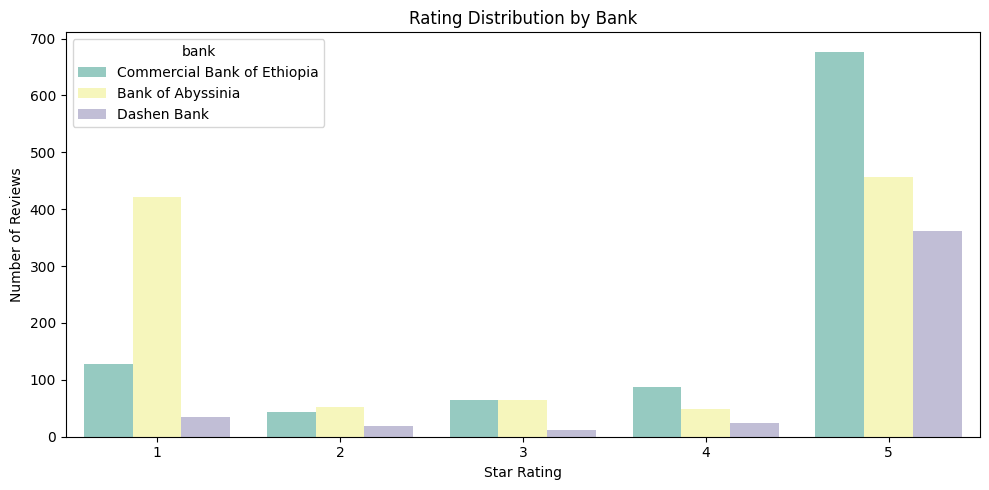

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', hue='bank', palette='Set3')
plt.title("Rating Distribution by Bank")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig("../data/plots/rating.png")
plt.show()

#### Sentiment Over Time

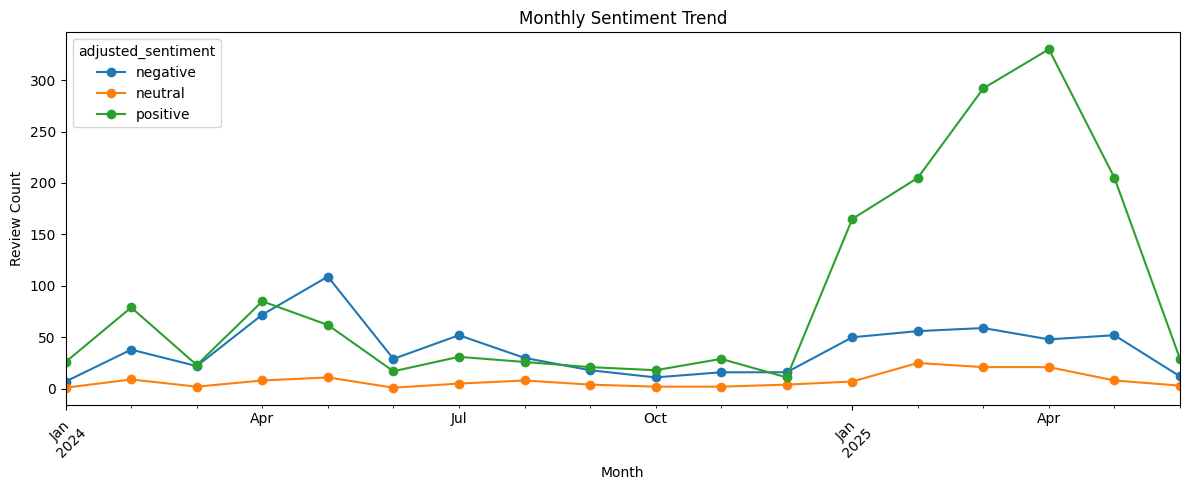

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df1["date"] = pd.to_datetime(df1["date"], errors='coerce')  

df1["month"] = df1["date"].dt.to_period("M")

sentiment_trend = df1.groupby(["month", "adjusted_sentiment"]).size().unstack().fillna(0)
sentiment_trend.plot(kind="line", figsize=(12, 5), marker='o')
plt.title("Monthly Sentiment Trend")
plt.ylabel("Review Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/plots/month_sentiment.png")
plt.show()

### Insights

### Positive Drivers

1. **Fast performance and easy navigation**  
   - Users praised the speed of transfers and simplicity of the UI  
   - Keywords: “fast”, “easy”, “user friendly”, “simple”  
   - Most frequent in CBE and Dashen

2. **Reliable functionality**  
   - Positive mentions of stability, especially on newer versions  
   - Keywords: “works well”, “no issues”, “smooth”

3. **Login and account lockouts**  
   - Many 1-star reviews mention login failures and locked accounts  
   - Common phrases: “can't login”, “password reset”, “account blocked”

4. **Crashes and failed transactions**  
   - Users complain about failed transfers or app freezing  
   - Keywords: “crash”, “not working”, “freeze”, “slow transfer”

### Bank Comparison

- **CBE**: Highest number of positive reviews. Most mentions of “fast” and “easy to use”
- **BOA**: Mixed reviews. Higher complaints of app “not working” or bugs
- **Dashen**: Strong “super app” branding, but more UI & crash complaints than CBE


### Suggested Improvements

1. **Biometric login or PIN reset flow** to reduce login complaints (CBE & BOA)
2. **Crash reporting feature** to collect error logs and improve reliability (Dashen)
3. **Add in-app FAQ or chatbot** for quick issue resolution (all banks)

### Ethical Note – Review Bias

- Online reviews often have a negative or extreme sentiment skew
- Neutral users are underrepresented because they're less likely to leave reviews
- Reviews are filtered to English — may miss issues expressed in Amharic